In [1]:
import pandas as pd, numpy as np
from bs4 import BeautifulSoup
import os
import unicodedata
from unidecode import unidecode
import string
import time
import lxml
from tqdm import tqdm
import pickle
import re

# Rentrez votre chemin
# os.chdir('C:/Users/theo.roudil-valentin/Documents/Codes')

# Sinon lancez simplement, cela reprendre vos config si vous avez déjà fait tourner les codes précédents
cwd=os.getcwd()
cwd
if cwd.split('\\')[-1] not in ['Bagging_model','Extraction_sommaire']:
    try:
        os.chdir("2021-NLP_AE\\Data\\Bagging_model")
    except:
        os.chdir("2021-NLP_AE\\Pipeline\\Extraction_sommaire")



In [3]:
# changez le 'new' par un numéro si vous voulez utiliser les données existantes, que vous aurez auparavant téléchargées
base=pickle.load(open("base_pour_Bagging_final_new.pickle",'rb'))

In [ ]:
base_1=base[base.label_RF==1]
numero_1=np.unique(base_1.num_etude)
# base_1
base_0=base[base.label_RF==0]
numero_0=np.unique(base_0.num_etude)
numero=[i for i in numero_0 if i not in numero_1]
numero

In [ ]:
for i in base[base.num_etude==numero[0]]

In [ ]:
numero=np.unique(base.num_etude)
numero

In [9]:
numero=np.unique(base.num_etude)
index=[i for i in numero if np.sum(base[base.num_etude==i].label_RF)==0]
base_relou=base[[True if base.num_etude[i] in index else False for i in base.index]]
print("Les documents vides tenaces représentent :",round(len(base_relou)/len(base)*100,2),'% des lignes de la base relou')
print("On a réussi à traiter ",round((1-len(np.unique(base_relou.num_etude))/len(numero))*100,2),"% des documents vides initiaux")
print("Il y a ",len(np.unique(base_relou.num_etude)),"études dont l'indicatrice sommaire est vide")

Les documents vides tenaces représentent : 11.42 % des lignes de la base relou
On a réussi à traiter  86.49 % des documents vides initiaux
Il y a  20 études dont l'indicatrice sommaire est vide


In [47]:
#numero=np.unique(base.num_etude)
index=[i for i in numero if np.sum(base[base.num_etude==i].label_RF)==0]
base_relou=base[[True if base.num_etude[i] in index else False for i in base.index]]
print("Les documents vides tenaces représentent :",round(len(base_relou)/len(base)*100,2),'% des lignes de la base relou')
print("On a réussi à traiter ",round((1-len(np.unique(base_relou.num_etude))/len(numero))*100,2),"% des documents vides initiaux")
print("Il y a ",len(np.unique(base_relou.num_etude)),"études vides")

Les documents vides tenaces représentent : 11.5 % des lignes de la base relou
On a réussi à traiter  85.14 % des documents vides initiaux
Il y a  22 études dont l'indicatrice sommaire est vide


In [10]:
from random import randint

n=randint(0,len(numero))
print(numero[n],"\n")
for i in base[base.num_etude==numero[n]].phrase_2.values:
    #if len(i)>1:
    print(i)

192770 

Modèle de rapport Antea
antea’group
Raccordements Massileo et Galerie de
la Mer
Extension de capacité de la boucle primaire thalassothermique et la création d'une boucle sur les eaux de la Galerie de la Mer
Marseille (13)
Demande d'autorisation Environnementale
Décembre 2017
Rapport n° 91738/A

Optimal Solutions

^^dalkia
W
EDF OPTIMAL SOLUTIONS
Immeuble Wilson - 5eme étage 70-80 Avenue du General de Gaulle 92800 PUTEAUX
Antea Group
Région Rhône -Alpes-Méditerranée
Pôle Environnement
Parc Napollon - 400, avenue du Passe-Temps 13676 AUBAGNE Cedex
Tél. : 04 42 08 7
Raccordements Massileo et Galerie de
la Mer
Extension de capacité de la boucle primaire thalassothermique et la création d'une boucle sur les eaux de la Galerie de la Mer
Marseille (13)
Pièce II : Lettre de demande Présentation Dossier graphique
Décembre 2017
Rapport n° 91738/A
Optimal Solutions   
*£?dalkia
1
EDF OPTIMAL SOLUTIONS
Immeuble Wilson - 5eme étage 70-80 Avenue du General de Gaulle 92800 PUTEAUX
Raccordeme

In [18]:
def stat_des(x,mo,k=2):
    if mo=='mean':
        y=np.mean(x)
    elif mo=='std':
        y=np.std(x)
    elif mo=='med':
        y=np.median(x)
    else:
        raise ValueError('Veuillez spécifier quel type de stat des vous voulez. Valeurs possibles : mean, std ou med')
    z=round(y,k)
    return z
distrib_label=[base[base.num_etude==i].label_RF.sum() for i in numero]
m=stat_des(distrib_label,'mean')
s=stat_des(distrib_label,'std')
me=stat_des(distrib_label,'med')
print("La moyenne du nombre de lignes labellisées est :",m,"\nL'écart-type est:",s,"\nLa médiane est:",me)


La moyenne du nombre de lignes labellisées est : 232.51 
L'écart-type est: 241.03 
La médiane est: 168.0


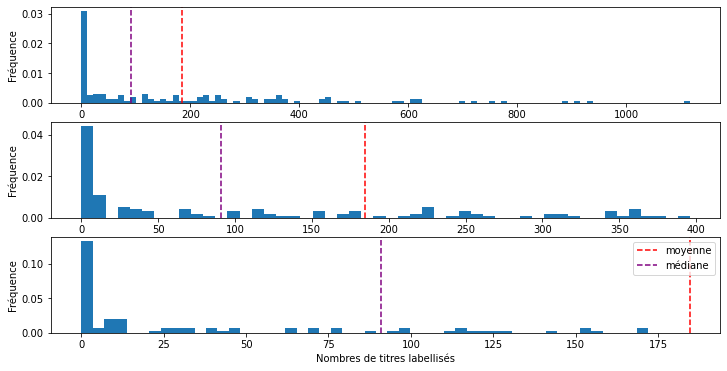

In [35]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(3,figsize=(12,6))
ax[0].hist(distrib_label,density=True,bins=100)
ax[1].hist([i for i in distrib_label if i<400],density=True,bins=50)
ax[2].hist([i for i in distrib_label if i<175],density=True,bins=50)

for i in range(3):
    ax[i].axvline(m,color='red',linestyle='--',label='moyenne'),ax[i].axvline(me,color='purple',linestyle='--',label='médiane')
    ax[i].set_xlabel('Nombres de titres labellisés'),ax[i].set_ylabel('Fréquence')
plt.legend(['moyenne','médiane'])

In [51]:
inf_100=[i for i in distrib_label if i<100 and i>25]
print("Il y a ",len(inf_100),"études qui comportent moins de 100 titres mais plus de 25.")
inf_25=[i for i in distrib_label if i<=25 and i >0]
print("Il y a ",len(inf_25),"études qui comportent moins de 25 titres.")
sup_100=[i for i in distrib_label if i>100]
print("Il y a ",len(sup_100),"études qui comportent plus de 100 titres.")
egal_0=[i for i in distrib_label if i==0]
print("Il y a ",len(egal_0),"études qui ne comportent aucun titres.")

Il y a  20 études qui comportent moins de 100 titres mais plus de 25.
Il y a  35 études qui comportent moins de 25 titres.
Il y a  71 études qui comportent plus de 100 titres.
Il y a  22 études qui ne comportent aucun titres.


In [53]:
sup_50=[i for i in distrib_label if i>50]
sup_50_num=[numero[distrib_label.index(i)] for i in sup_50]
import pickle
# da=dataiku.Folder('lZ0B3sSL')
# pickle.dump(sup_50_num,open(da.get_path()+'num_etude_sup_50_titres.pickle','wb'))

In [40]:
petit_titres=[n for n in numero if distrib_label[list(numero).index(n)]<100 and distrib_label[list(numero).index(n)]>25]
#petit_titres=[n for n in numero if distrib_label[list(numero).index(n)]<25]
for n in petit_titres:
    print("\nOn regarde l'étude suivante :",n,"\n")
    for i in base[base.label_RF==1][base.num_etude==n].phrase_2.values:
        #if len(i)>1:
        print(i)


On regarde l'étude suivante : 106168 

SOMMAIRE
1 ETAT INITIAL DE L'ENVIRONNEMENT
1.1 ZONE D'ETUDE
1.2
Habitats biologiques
1.2.1 Méthodologie
1.2.2 Résultats
1.2.3 Enjeux.
1.3
1.3.1 Résultats
1.3.2 Enjeux.
1.4
Avifaune migratrice postnuptiale
1.4.1 Méthodologie
1.4.2 Résultats
1.4.3 Enjeux.
1.5
Avifaune hivernante
1.5.1 Méthodologie
1.5.2 Résultats
1.5.3 Enjeux.
1.6
Avifaune migratrice prénuptiale
1.6.1 Méthodologie
1.6.2 Résultats
1.6.3 Enjeux.
1.7
SYNTHESE DES MIGRATIONS
1.8
Avifaune nicheuse
1.8.1 Méthodologie
1.8.2 Résultats
1.8.3 Espèces remarquables
1.8.4 Habitats d'espèces
1.8.5 Enjeux.
1.9
Milan royal
1.9.1 Méthodologie
1.9.2 Résultats
1.9.3 Enjeux.
1.10
Busards
1.10.1 Méthodologie
1.10.2 Résultats
1.10.3 Enjeux.
1.11
87
93
95
1.11.5 Enjeux.
1.12
1.12.1 Méthodologie
1.12.2 Résultats
1.12.3 Espèces patrimoniales
1.12.4 Enjeux.
1.13
1.13.1 Méthodologie
1.13.2 Résultats
1.13.3 Enjeux.
1.14
Continuités écologiques
1.14.1 Au niveau national
1.14.2 Au niveau régional
1.14.3 Au nive

/data/dataiku/data_dir_design/code-envs/python/THEO_/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Contexte reglementaire
Une volonte politique
1
2
30 cm Sable compacté
2
2
Le réseau externe
Le poste de livraison
2
A CONSTRUCTION
«
Genie Civil
Le planning du chantier
3
Le montage de l’eolienne
nan
nan
3
Le montant des garanties financieres
=
L’aire d’etude eloignee
Topographie
Pedologie
L’alea-retrait gonflement des argiles
Hydrogéologie
2
Charente
1
3
3
3
2
Tableau 12 : Zones de sismicité
Communication et trafic
Les reseaux
1
3
Tableau 15 : ICPE sur la commune de Villeneuve-la-Comtesse
3
3
3
3
3
3

On regarde l'étude suivante : 196719 

METHODOLOGIE ET PROBLEMES RENCONTRES
1.1. Guides méthodologiques
1.2. Démarche du bureau d’études et intervenants
1.3. Sites internet consultés
1.4. Données bibliographiques et qualification de l’état initial
1.5. Difficultés rencontrées
2.1. Rédacteur de l’expertise
2.2.
3.1. Intervenants
3.2. Synthèse de la connaissance et prédiagnostic
3.3. Réalisation de l'état des lieux
3.3.1. Moyens et méthodes de prospection
3.3.2. Présentation des résultats


1. PREAMBULE 6
2. DESCRIPTION DE L’ETAT ACTUEL DU SITE 7
Contexte hydrologique
E
La trame verte et bleue - Continuité Ecologique
Nuisances et pollutions existantes
3. ANALYSE DES EFFETS DIRECTS ET INDIRECTS, TEMPORAIRES ET PERMAMENTS DE
,
Mesures complementaires pour eviter ou reduire les impacts sur l'air et les
,
CONNUS
Dechets
Compatibilite avec les plans de gestion des dechets et effets sur
CONNUS
Vibrations
Émissions lumineuses
CONNUS
Impact lie au trafic
,
CONNUS
MRS3
MRS3
CONNUS
4. EVALUATION DES RISQUES SANITAIRES 59
5. RAISON DU CHOIX DU SITE 59
6. CONDITIONS DE REMISE EN ÉTAT DU SITE ET AVIS DU MAIRE ET DU PROPRIETAIRE 60
Garanties financieres

On regarde l'étude suivante : 1970285 

SOMMAIRE
II.1 . Zones naturelles d’intérêt local
II.2 . Zone Natura 2000
II.3 . ZNIEFF de type 1
II.4 . Parc naturel marin
II.5 . Autres types de zones
II.6 . Bilan du patrimoine naturel local aux abords du projet
III. 1. Définition
III. 2. Application à l’échelle régionale : le SRCE de Bretagne


Sommaire
Chapitre A
-
Presentation generale
2 Contexte éolien
4 La société SOLVEO Energie
Chapitre B
-
Etat initial de l’ENVIRONNEMENT
1 Aires de l'étude
2 Contexte physique
3 Contexte paysager
4 Contexte environnemental et naturel
5 Contexte humain
6 Enjeux identifiés du territoire
Chapitre C
-
Variantes et justification du projet
1 Contexte politique et énergétique du projet
2 Raisons du choix de la zone d’implantation du projet
3 Scénario de référence et évolution de l’environnement
4 Analyse des variantes
5 Le choix du projet retenu
Chapitre D
-
Description du projet
1 Présentation du projet
2 Les caractéristiques techniques du parc
3 Les travaux de mise en place
4 Les travaux de démantèlement
5 Les garanties financières
Chapitre E
-
Impacts et mesures
1 Concept d'impacts proportionnels et de mesures
2 Impacts et mesures lies a la phase chantier
3 Impacts et mesures, phase d’exploitation
4 Impacts et mesures, phase de démantèlement
5 Impacts cumulés
6 Impacts et mesures vis-à-vis d

In [54]:
base.iloc[:,3:]

,0,ventre_0,ventre_1,ventre_2,ventre_3,ventre_4,ventre_5,ventre_6,ventre_7,ventre_8,ventre_9,ventre_10,ventre_11,33,34,35,36,37,38,39,40,f_mots,f_carac,html_carac,ind_sommaire,sommaire_longueur,sommaire_int,caractere_spec,label_k_2,label_k_1,label_RF
0,0.000000,1.011774,-0.591469,0.488021,0.510556,-0.444402,0.198387,0.545548,0.769158,0.155397,-0.006606,0.019738,-0.001167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.006463,0.005215,0.0,0.0,0.0,0,0,0,0.0
1,0.048998,0.212955,0.296916,1.241299,0.227543,-0.247805,0.013655,-0.101384,-0.118657,0.079249,-0.000915,-0.113507,0.026703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000431,0.027724,0.0,0.0,0.0,0,0,0,0.0
2,0.022272,-0.175923,0.032084,0.928197,-0.481698,-0.048922,-0.260112,-0.017651,-0.048195,0.280094,-0.105416,-0.128777,0.033565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001293,0.014548,0.0,0.0,0.0,0,0,0,0.0
3,0.001114,0.726076,-0.087353,-0.508347,-0.399681,-0.037802,-0.162331,0.048796,-0.031487,0.027015,-0.065471,-0.019246,0.002232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.006463,0.010705,0.0,0.0,0.0,0,0,0,0.0
4,0.001114,0.726076,-0.087353,-0.508347,-0.399681,-0.037802,-0.162331,0.048796,-0.031487,0.027015,-0.065471,-0.019247,0.002232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002154,0.007960,0.0,0.0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443029,0.001114,1.114668,0.176993,-0.196045,0.309091,-0.236218,0.111081,-0.033960,-0.101596,-0.174101,0.037135,-0.003449,-0.004757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.028867,0.023058,0.0,0.0,0.0,0,0,0,0.0
2443030,0.001114,1.173399,0.048847,-0.097062,0.144797,0.293721,0.981983,0.368427,-0.496930,-0.051946,0.074873,-0.069582,0.008107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.012495,0.024979,0.0,0.0,0.0,0,0,0,0.0
2443031,0.000000,0.713432,-1.006994,0.298064,-0.309809,0.226638,0.889741,1.310513,0.878454,0.641796,-0.088075,-0.065534,0.018951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000431,0.016744,0.0,0.0,0.0,0,0,0,0.0
2443032,0.001114,0.384110,1.018847,0.595274,0.134531,-0.159573,0.126530,-0.092664,-0.072608,0.083054,0.011007,-0.134520,0.019733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.000000,0.014548,0.0,0.0,0.0,0,0,0,0.0


#### Après l'ajout des nouvelles features
L'algorithme semble tout autant capable de détecter les titres, cependant il semble beaucoup plus performant pour discriminer les non-titres, ou en tout cas ce qui ne fait pas partie du sommaire.

Une limitation : il semble garder des touts petits bouts (chiffres) de phrases. Mais cela peut être filtré a posteriori je pense.


#### Avant l'ajout des nouvelles features
On remarque que beaucoup de choses ne sont pas des titres. Mais est-ce vraiment le cas ?

En fait l'algorithme semble classer également les premiers paragraphes des titres (puisque le titre est associé au premier paragraphe semble-t-il). Du coup, on a bien le sommaire au début, puis ensuite directement des bouts de sections avec le titre.

Pourquoi l'algo classifie-t-il les paragraphes avec les titres comme des titres ? Pour la simple et bonne raison que le titre présent apporte l'information pour être classifié comme titre.

In [ ]:
base[base.num_etude==np.unique(base.num_etude)[3]]

In [ ]:
for i in base[base.label_RF==1][base.num_etude==np.unique(base.num_etude)[3]].phrase_2.values:
    #if len(i)>1:
        print(i)

Spécificité de l'étude suivante : le sommaire est en double-page, et visiblement cela cause quelques soucis à l'aglo.

Question : est-ce que l'OCRisation se passe bien en fait ?

In [ ]:
for i in base[base.label_RF==1][base.num_etude==np.unique(base.num_etude)[5]].phrase_2.values:
    #if len(i)>1:
        print(i)

In [ ]:
for i in base[base.label_RF==1][base.num_etude==np.unique(base.num_etude)[6]].phrase_2.values:
    print(i)

In [ ]:
# Compute recipe outputs from inputs
# TODO: Replace this part by your actual code that computes the output, as a Pandas dataframe
# NB: DSS also supports other kinds of APIs for reading and writing data. Please see doc.

sommaire_exemple_df =  # For this sample code, simply copy input to output


# Write recipe outputs
sommaire_exemple = dataiku.Dataset("sommaire_exemple")
sommaire_exemple.write_with_schema(sommaire_exemple_df)